## Importación de librerías

In [1]:
import os 
os.chdir(os.path.dirname(os.getcwd())) # Change working directory to parent directory

In [2]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from test_harness.datasets.dataset import Dataset
from test_harness.experiments._1_baseline_experiment import BaselineExperiment
from test_harness.experiments._2_response_uncertainty_experiment import UncertaintyKSExperiment
from test_harness.experiments._3_margin_uncertainty_experiment import UncertaintyX2Experiment
from test_harness.experiments._4_margin_threshold_experiment import MarginThresholdExperiment
from test_harness.experiments._5_topline_experiment import ToplineExperiment

from test_harness.utils.utils import (
    plot_experiment_error,
    plot_multiple_experiments,
    aggregate_experiment_metrics,
    plot_KS_drift_distributions,
    plot_XS_drift_margin_distributions
)

import matplotlib.pyplot as plt

%matplotlib inline

## Preparación de los experimentos

In [3]:
def define_run_exps(model, param_grid, dataset, delete_csv=False):

    exps = []

    # baseline experiment
    baseline = BaselineExperiment(model=model, dataset=dataset, param_grid=param_grid, delete_csv=delete_csv)
    # print("Running baseline experiment")
    baseline.run()
    exps.append(baseline)

    # response uncertainty experiment
    uncertainty_ks = UncertaintyKSExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=0.001,
        delete_csv=delete_csv
    )
    # print("Running response uncertainty experiment")
    uncertainty_ks.run()
    exps.append(uncertainty_ks)
    
    # margin uncertainty experiment
    uncertainty_x2 = UncertaintyX2Experiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        significance_thresh=0.01,
        margin_width=0.2,
        delete_csv=delete_csv
    )
    # print("Running margin uncertainty experiment")
    uncertainty_x2.run()
    exps.append(uncertainty_x2)
    
    # margin threshold experiment (sensitivity = 0.5)
    margin_threshold_1 = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=0.2,
        sensitivity=0.5,
        delete_csv=delete_csv
    )
    # print("Running margin threshold experiment; sensitivity=0.5")
    margin_threshold_1.run()
    exps.append(margin_threshold_1)

    # margin threshold experiment (sensitivity = 1)
    margin_threshold_2 = MarginThresholdExperiment(
        model=model,
        dataset=dataset,
        param_grid=param_grid,
        k=5,
        margin_width=0.2,
        sensitivity=1,
        delete_csv=delete_csv
    )
    # print("Running margin threshold experiment; sensitivity=1")
    margin_threshold_2.run()
    exps.append(margin_threshold_2)

    # topline experiment
    topline = ToplineExperiment(
        model=model,
        dataset=dataset,
        k=5,
        param_grid=param_grid,
        delete_csv=delete_csv
    )
    # print("Running topline experiment")
    topline.run()
    exps.append(topline)
    
    return exps 

## Carga de datos y ejecución de experimentos

### Random Tree - abrupto

In [4]:
# Load data
change_points = [10000]

column_mapping = {
    "target": "target",
    "int_features": ["x_cat_0"],
    "float_features": ["x_num_0", "x_num_1", "x_num_2", "x_num_3"],
}

dataset_RT_abr = pd.read_csv("./datasets/_13_data_RT_abrupto.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


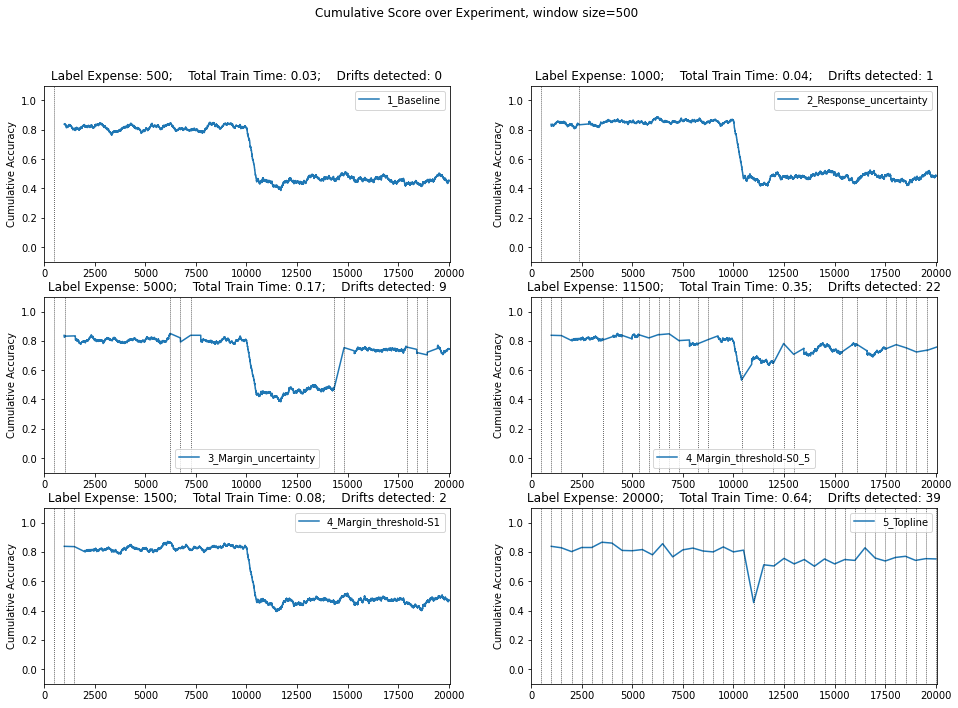

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.025,0,0,0,0,0.456000,0.00
2_Response_uncertainty,0.04,0.050,1,2,1,2,0.490000,0.00
3_Margin_uncertainty,0.17,0.250,9,2,9,2,0.744000,0.00
4_Margin_threshold-S0_5,0.35,0.575,22,1,22,1,0.757642,0.00
4_Margin_threshold-S1,0.08,0.075,2,21,2,21,0.474000,0.00
5_Topline,0.64,1.000,39,1,38,0,0.752000,0.05


Running experiments with window size = 1500


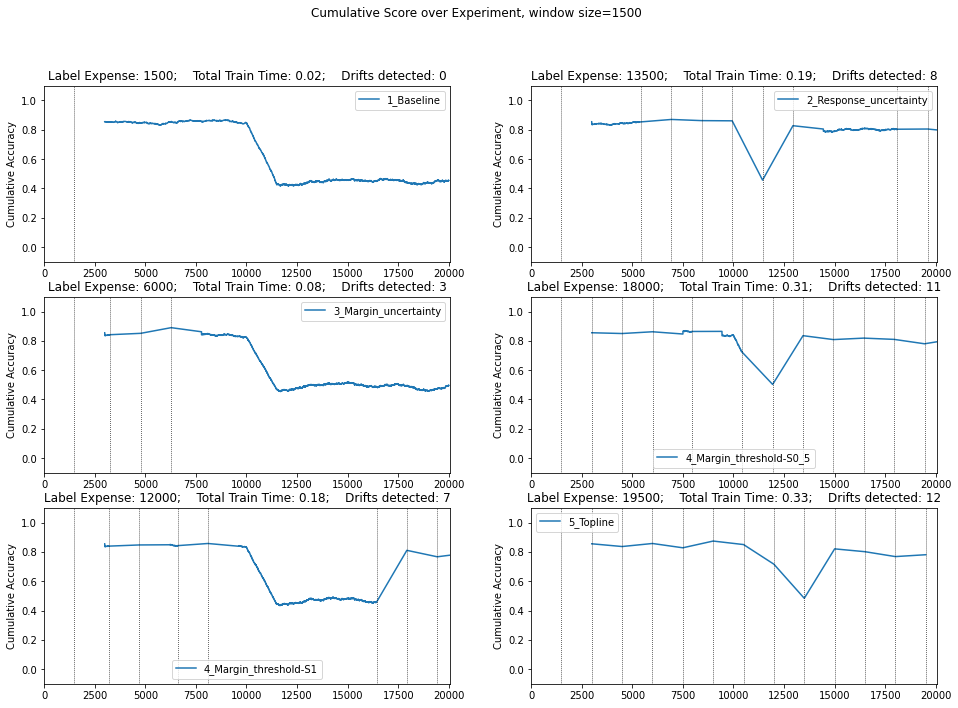

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.075,0,0,0,0,0.454233,0.000000
2_Response_uncertainty,0.19,0.675,8,1,7,0,0.785185,0.222222
3_Margin_uncertainty,0.08,0.300,3,4,3,4,0.495367,0.000000
4_Margin_threshold-S0_5,0.31,0.900,11,2,10,1,0.813620,0.153846
4_Margin_threshold-S1,0.18,0.600,7,2,7,2,0.792683,0.000000
5_Topline,0.33,0.975,12,1,11,0,0.780700,0.153846


Running experiments with window size = 2500


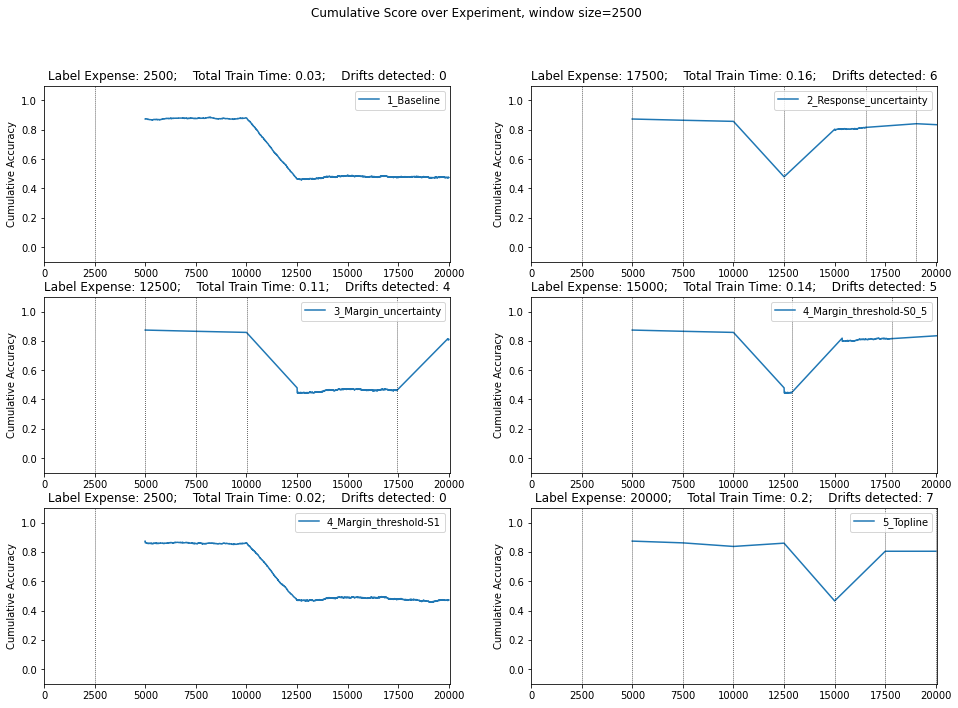

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.125,0,0,0,0,0.474800,0.00
2_Response_uncertainty,0.16,0.875,6,2,5,1,0.824818,0.25
3_Margin_uncertainty,0.11,0.625,4,1,4,1,0.809200,0.00
4_Margin_threshold-S0_5,0.14,0.750,5,1,5,1,0.837252,0.00
4_Margin_threshold-S1,0.02,0.125,0,2,0,2,0.471200,0.00
5_Topline,0.20,1.000,7,1,6,0,0.804400,0.25


Running experiments with window size = 3500


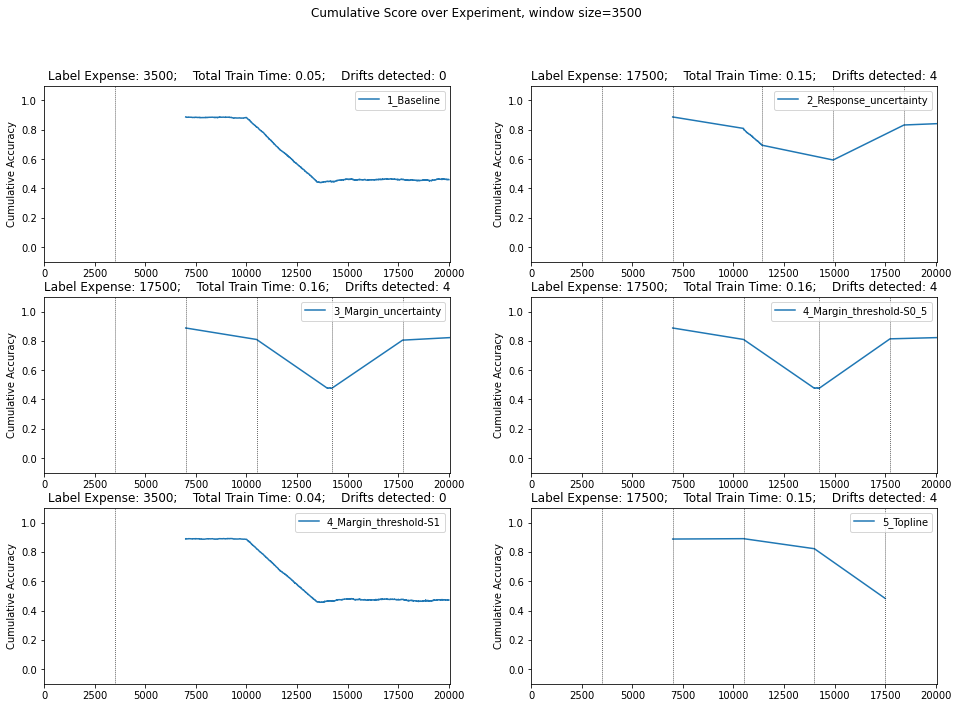

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.05,0.175,0,0,0,0,0.460214,0.000000
2_Response_uncertainty,0.15,0.875,4,2,3,1,0.852417,0.333333
3_Margin_uncertainty,0.16,0.875,4,2,3,1,0.830776,0.333333
4_Margin_threshold-S0_5,0.16,0.875,4,2,3,1,0.826490,0.333333
4_Margin_threshold-S1,0.04,0.175,0,2,0,2,0.471714,0.000000
5_Topline,0.15,0.875,4,1,3,0,0.482286,0.400000


In [5]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_13_data_RT_abrupto"
    dataset_13 = Dataset(name_ds, full_df=dataset_RT_abr, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_13.window_size}")
    exps = define_run_exps(model, param_grid, dataset_13, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_13.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


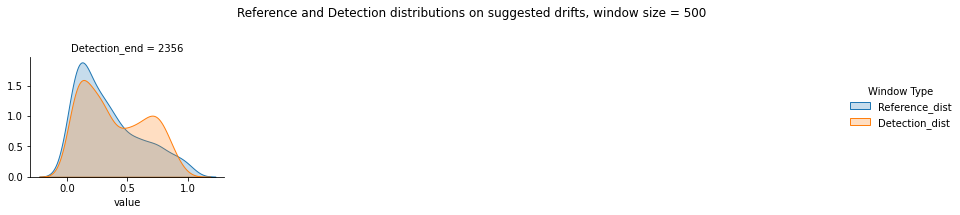

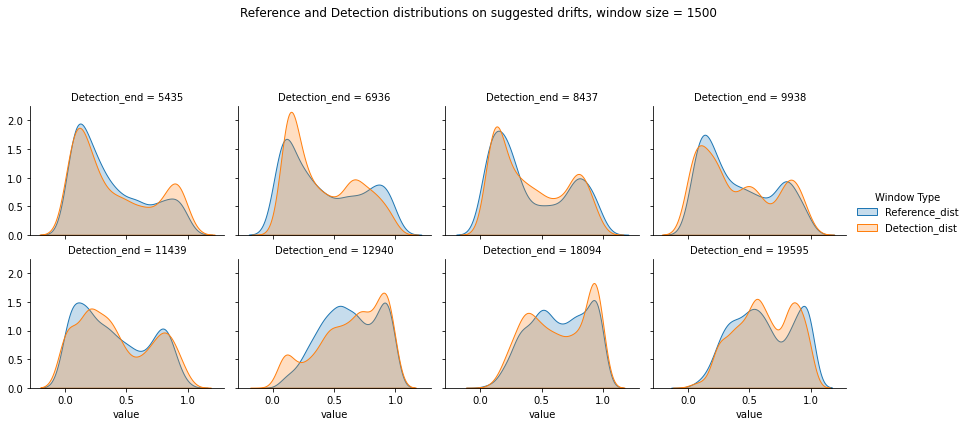

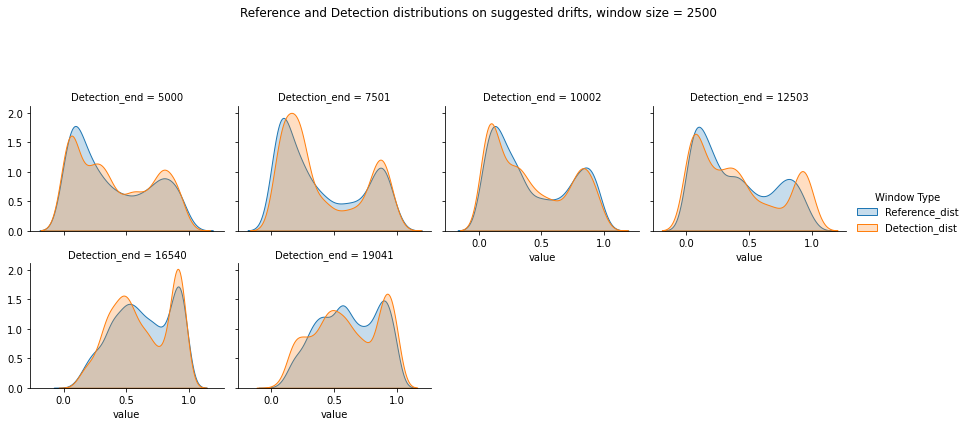

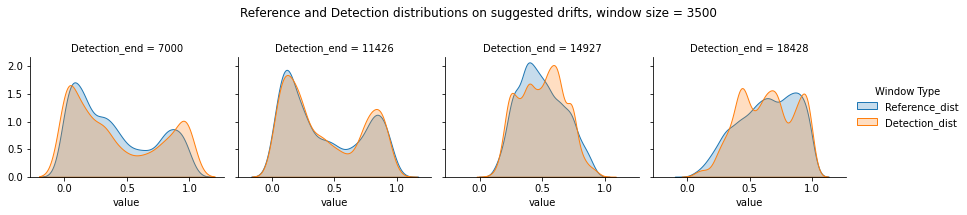

In [6]:
results_KS = pd.read_csv("./results/_13_data_RT_abrupto_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


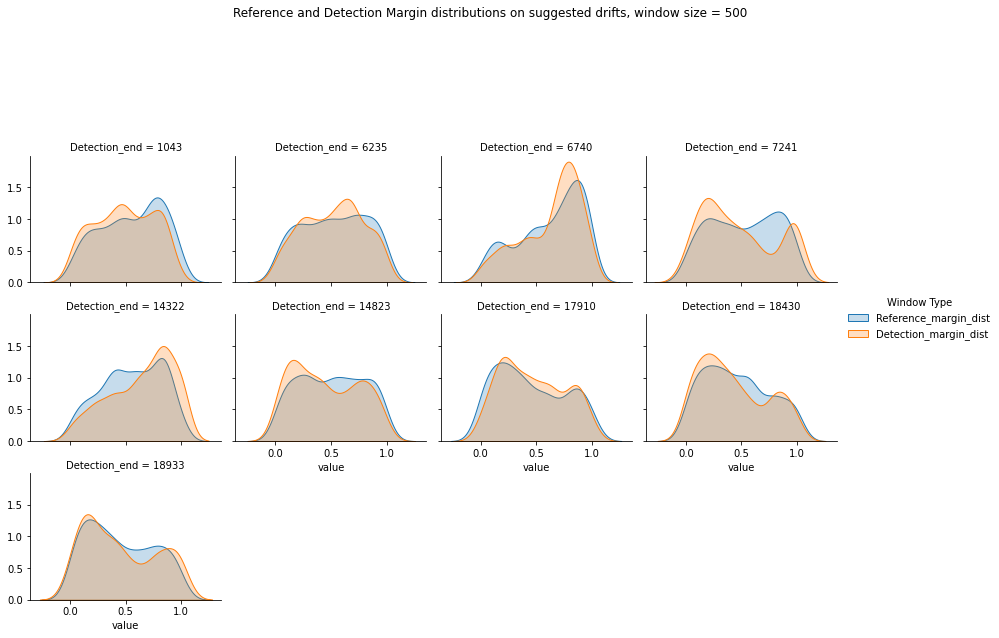

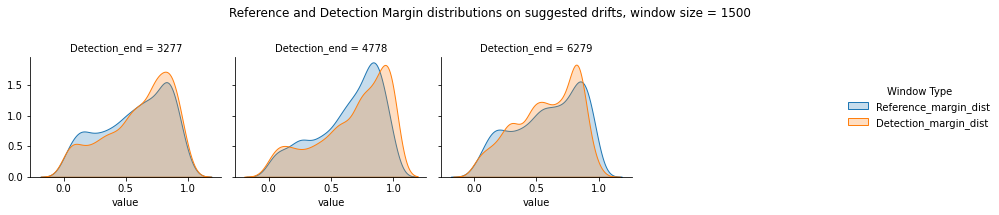

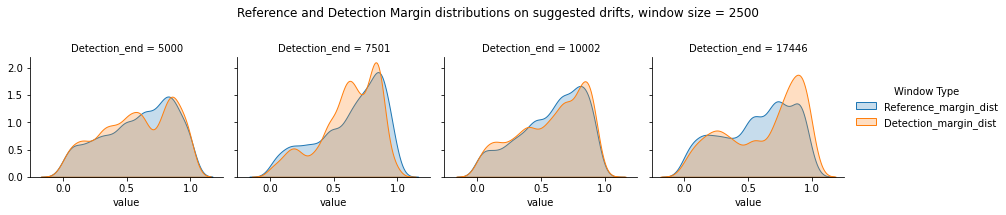

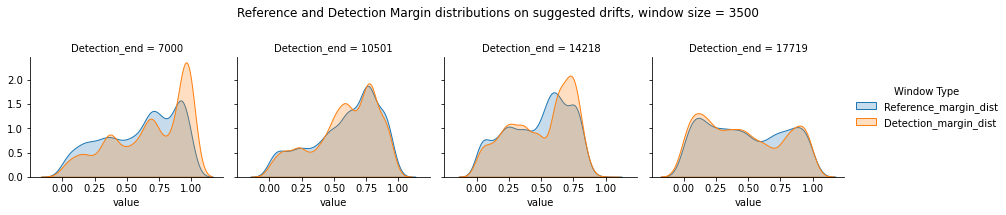

In [7]:
results_XS = pd.read_csv("./results/_13_data_RT_abrupto_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

### Random Tree - recurrente

In [8]:
# Load data
change_points = [5000,10000,15000]

column_mapping = {
    "target": "target",
    "int_features": ["x_cat_0"],
    "float_features": ["x_num_0", "x_num_1", "x_num_2", "x_num_3"],
}

dataset_RT_rec = pd.read_csv("./datasets/_14_data_RT_recurrente.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


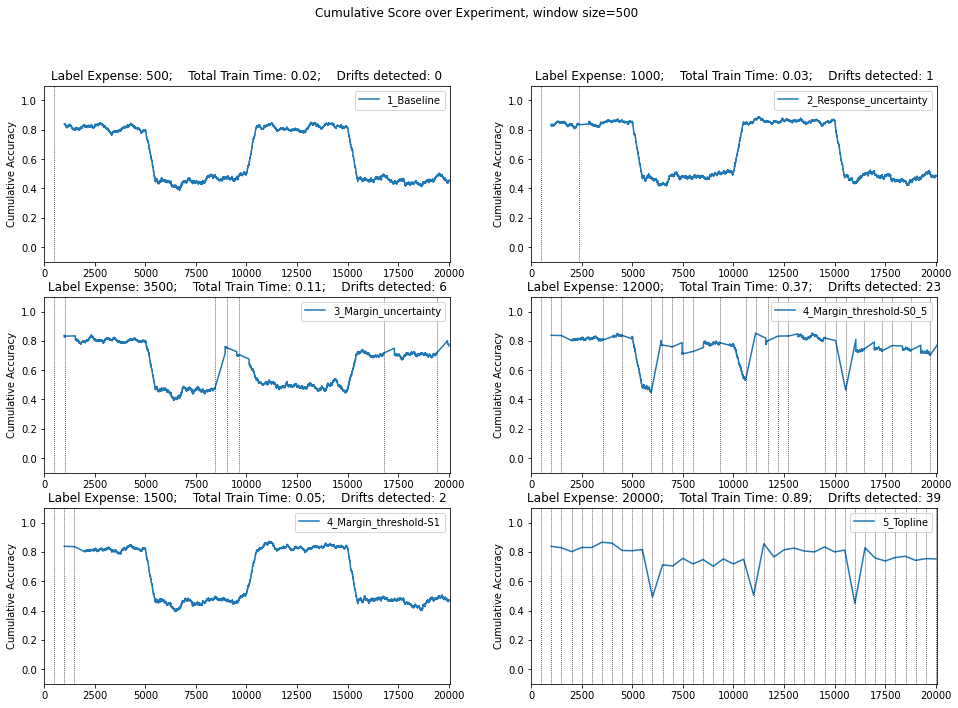

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.025,0,0,0,0,0.456000,0.000000
2_Response_uncertainty,0.03,0.050,1,5,1,5,0.490000,0.000000
3_Margin_uncertainty,0.11,0.175,6,5,6,5,0.766000,0.000000
4_Margin_threshold-S0_5,0.37,0.600,23,6,22,5,0.803636,0.068966
4_Margin_threshold-S1,0.05,0.075,2,21,2,21,0.474000,0.000000
5_Topline,0.89,1.000,39,1,38,0,0.752000,0.050000


Running experiments with window size = 1500


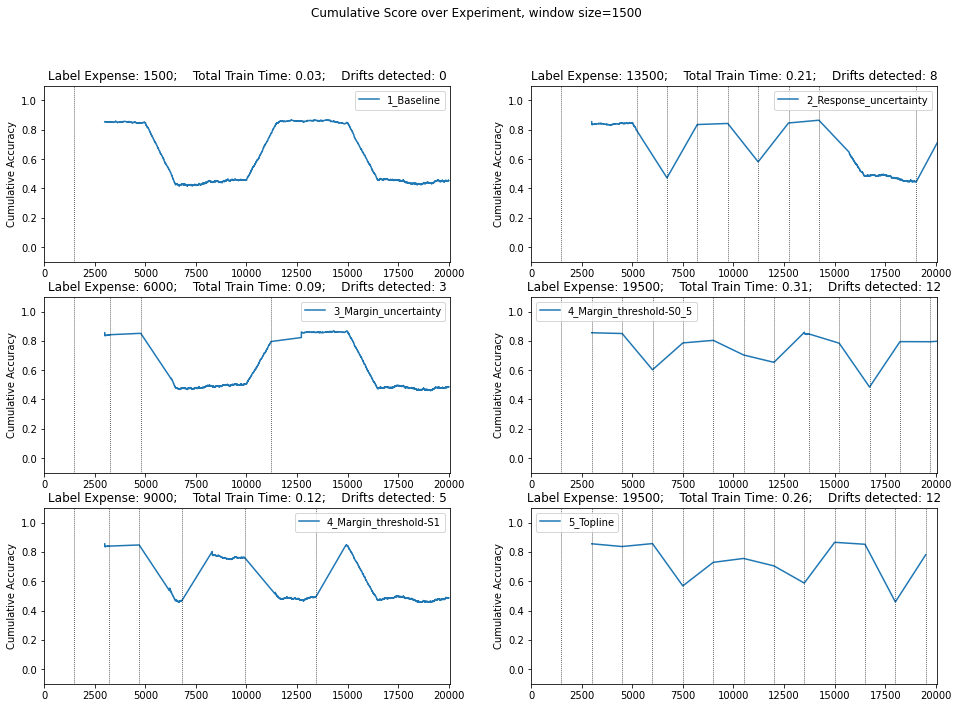

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.075,0,0,0,0,0.454233,0.000000
2_Response_uncertainty,0.21,0.675,8,4,6,2,0.829897,0.333333
3_Margin_uncertainty,0.09,0.300,3,6,3,6,0.486700,0.000000
4_Margin_threshold-S0_5,0.31,0.975,12,2,10,0,0.808118,0.285714
4_Margin_threshold-S1,0.12,0.450,5,5,5,5,0.486033,0.000000
5_Topline,0.26,0.975,12,2,10,0,0.780700,0.285714


Running experiments with window size = 2500


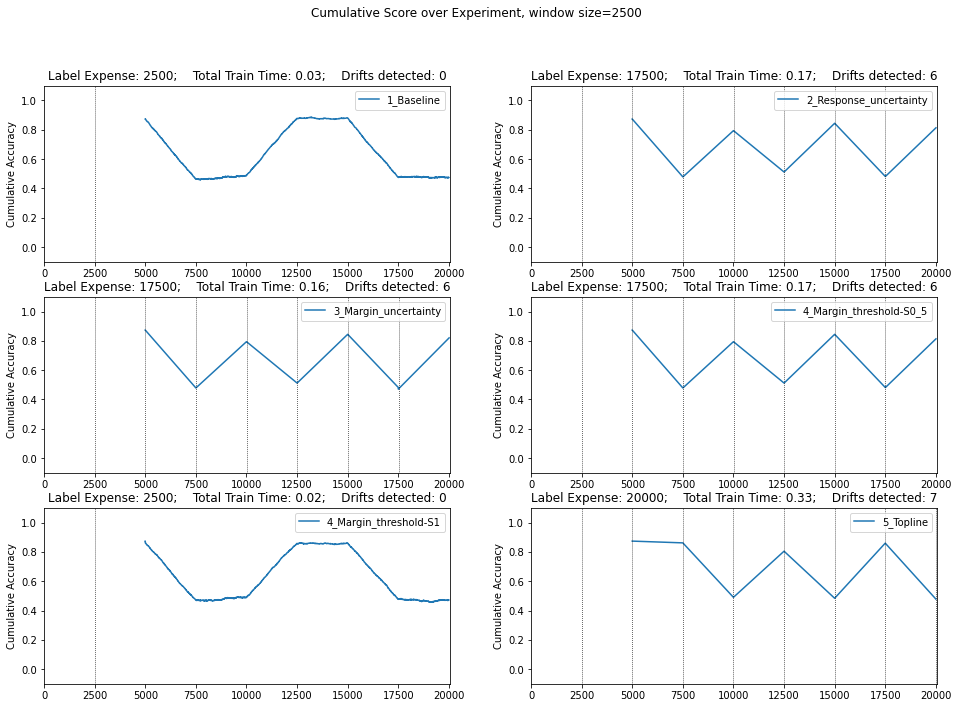

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.03,0.125,0,0,0,0,0.474800,0.000000
2_Response_uncertainty,0.17,0.875,6,3,3,0,0.813627,0.666667
3_Margin_uncertainty,0.16,0.875,6,3,4,1,0.820338,0.444444
4_Margin_threshold-S0_5,0.17,0.875,6,3,3,0,0.813627,0.666667
4_Margin_threshold-S1,0.02,0.125,0,5,0,5,0.471200,0.000000
5_Topline,0.33,1.000,7,1,6,0,0.478400,0.250000


Running experiments with window size = 3500


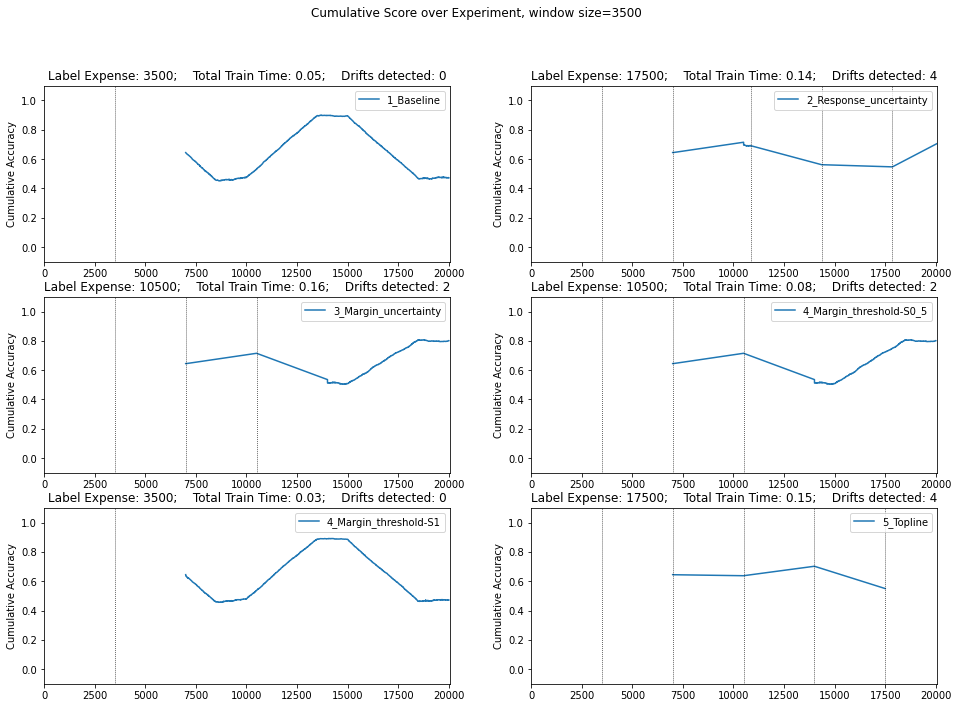

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.05,0.175,0,0,0,0,0.472371,0.000000
2_Response_uncertainty,0.14,0.875,4,2,2,0,0.799534,0.666667
3_Margin_uncertainty,0.16,0.525,2,3,1,2,0.800571,0.400000
4_Margin_threshold-S0_5,0.08,0.525,2,3,1,2,0.800571,0.400000
4_Margin_threshold-S1,0.03,0.175,0,4,0,4,0.471714,0.000000
5_Topline,0.15,0.875,4,2,2,0,0.549714,0.666667


In [9]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_14_data_RT_recurrente"
    dataset_14 = Dataset(name_ds, full_df=dataset_RT_rec, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_14.window_size}")
    exps = define_run_exps(model, param_grid, dataset_14, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_14.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


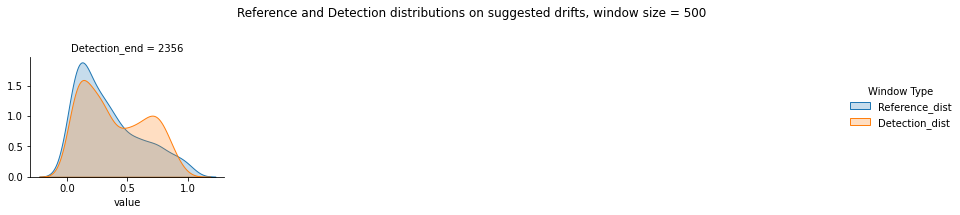

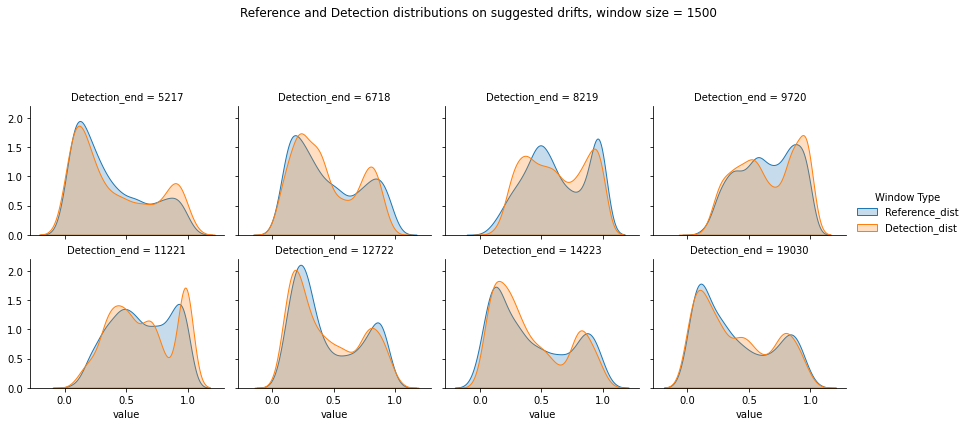

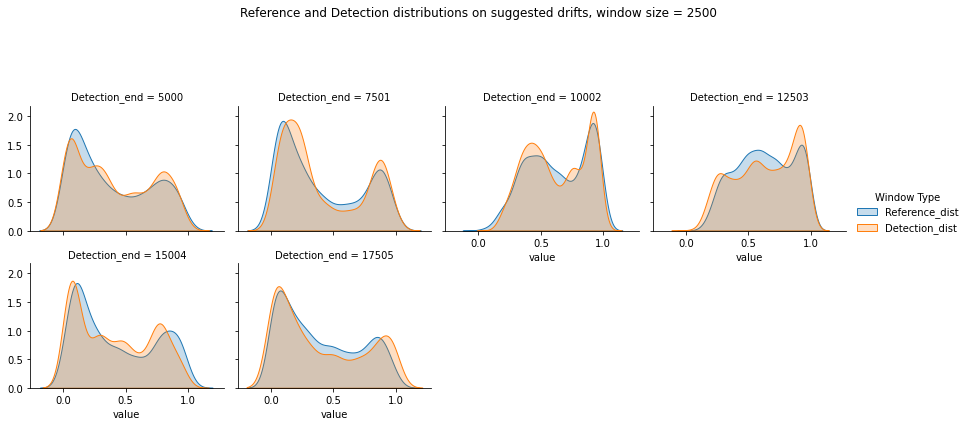

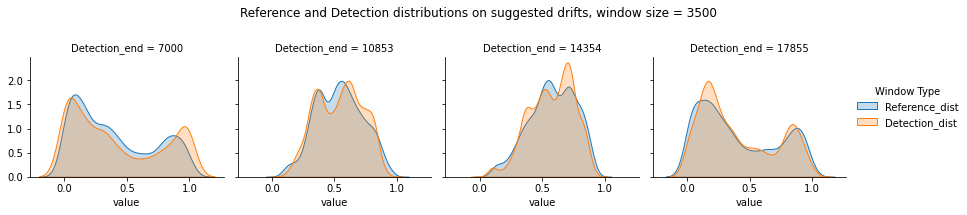

In [10]:
results_KS = pd.read_csv("./results/_14_data_RT_recurrente_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


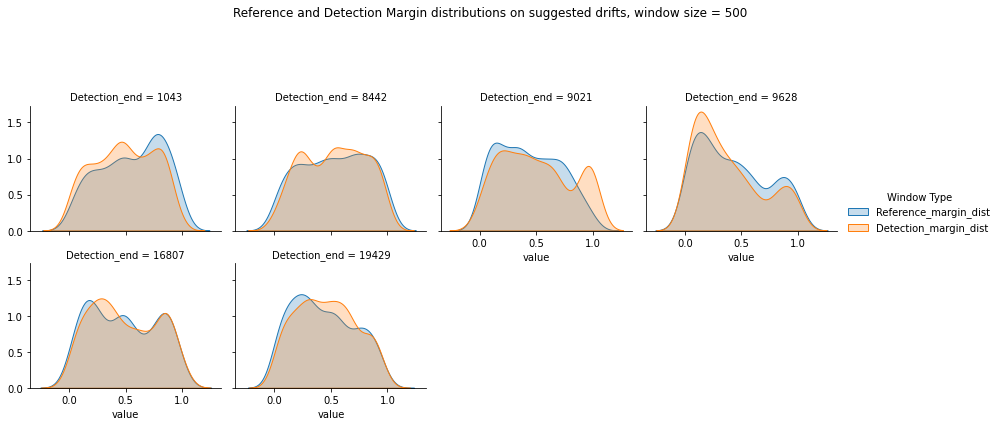

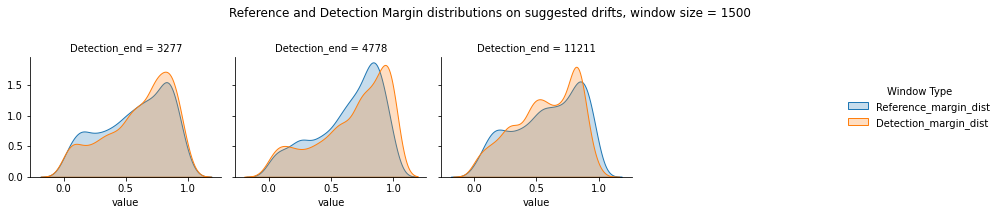

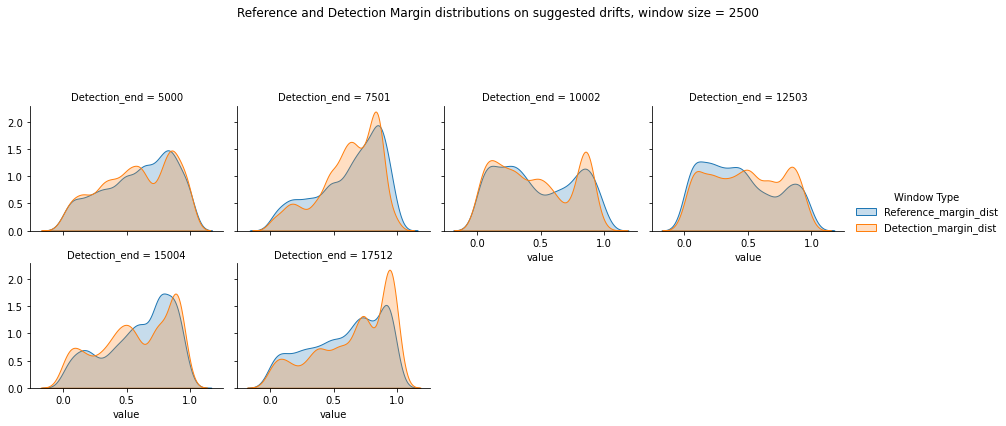

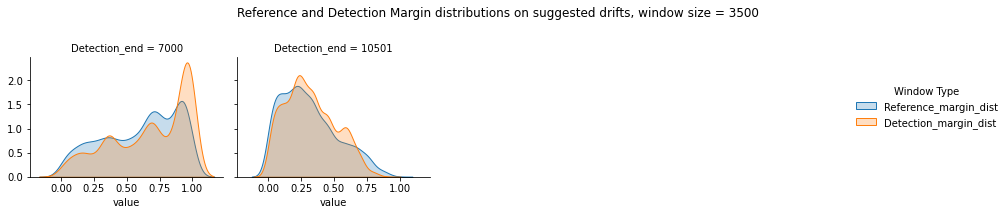

In [11]:
results_XS = pd.read_csv("./results/_14_data_RT_recurrente_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])

### Random Tree - Gradual

In [12]:
# Load data
change_points = [9750]

column_mapping = {
    "target": "target",
    "int_features": ["x_cat_0"],
    "float_features": ["x_num_0", "x_num_1", "x_num_2", "x_num_3"],
}

dataset_RT_grad = pd.read_csv("./datasets/_15_data_RT_gradual.csv")

model = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=5)
param_grid = {"clf__n_estimators": [5], "clf__max_depth": [5]}

Running experiments with window size = 500


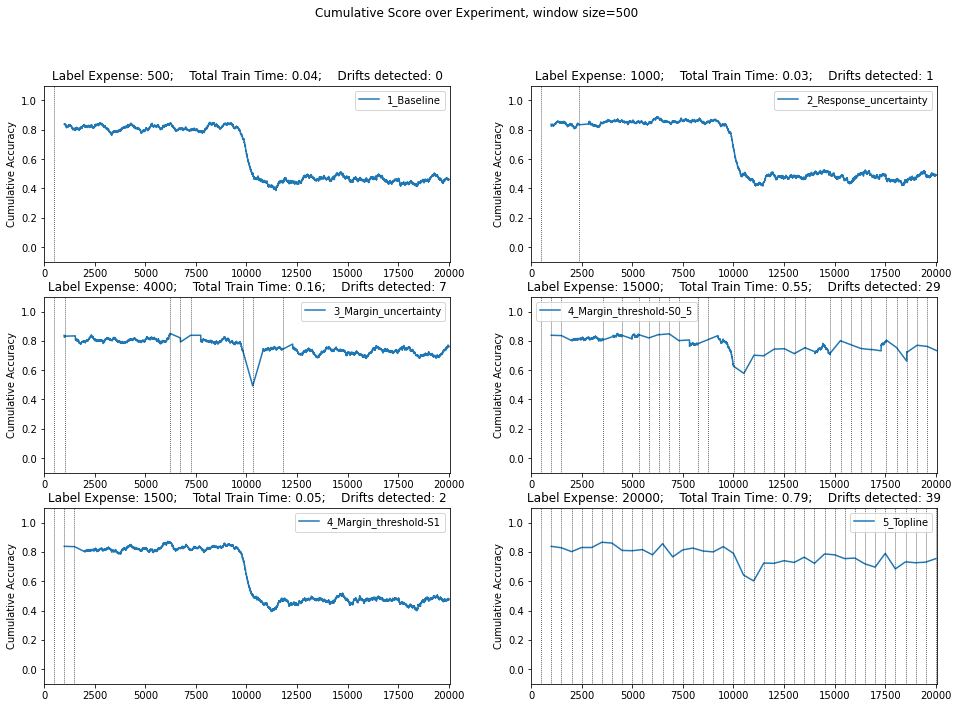

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.04,0.025,0,0,0,0,0.460000,0.000000
2_Response_uncertainty,0.03,0.050,1,2,1,2,0.490000,0.000000
3_Margin_uncertainty,0.16,0.200,7,2,6,1,0.760000,0.222222
4_Margin_threshold-S0_5,0.55,0.750,29,1,29,1,0.731132,0.000000
4_Margin_threshold-S1,0.05,0.075,2,24,2,24,0.474000,0.000000
5_Topline,0.79,1.000,39,2,37,0,0.754000,0.097561


Running experiments with window size = 1500


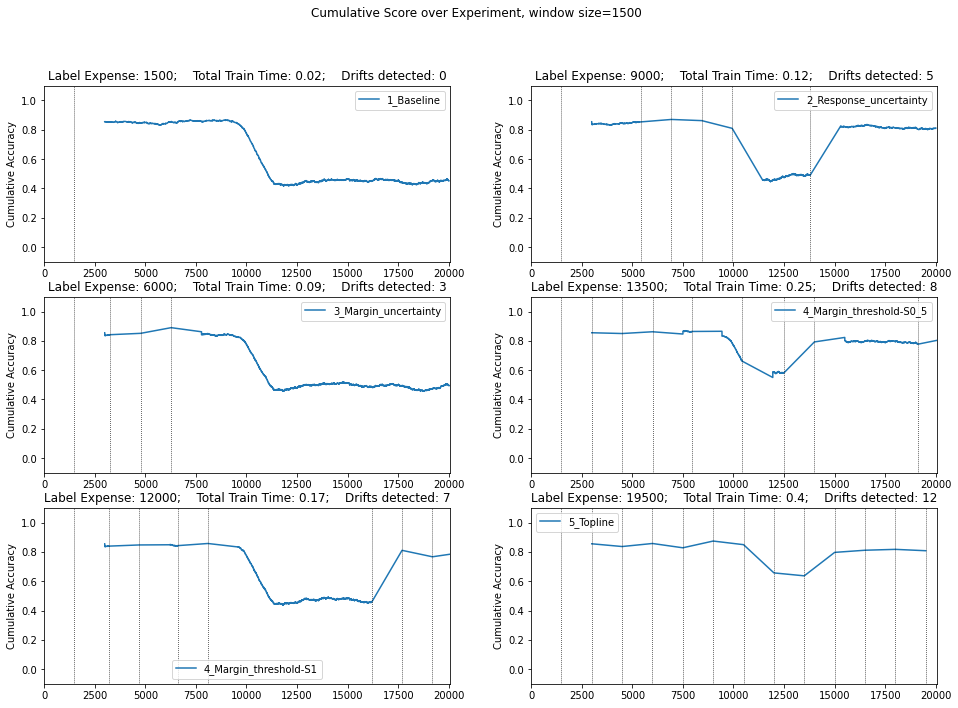

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.02,0.075,0,0,0,0,0.450733,0.000000
2_Response_uncertainty,0.12,0.450,5,1,5,1,0.811367,0.000000
3_Margin_uncertainty,0.09,0.300,3,4,3,4,0.494667,0.000000
4_Margin_threshold-S0_5,0.25,0.675,8,2,8,2,0.819005,0.000000
4_Margin_threshold-S1,0.17,0.600,7,2,7,2,0.796798,0.000000
5_Topline,0.40,0.975,12,1,11,0,0.807967,0.153846


Running experiments with window size = 2500


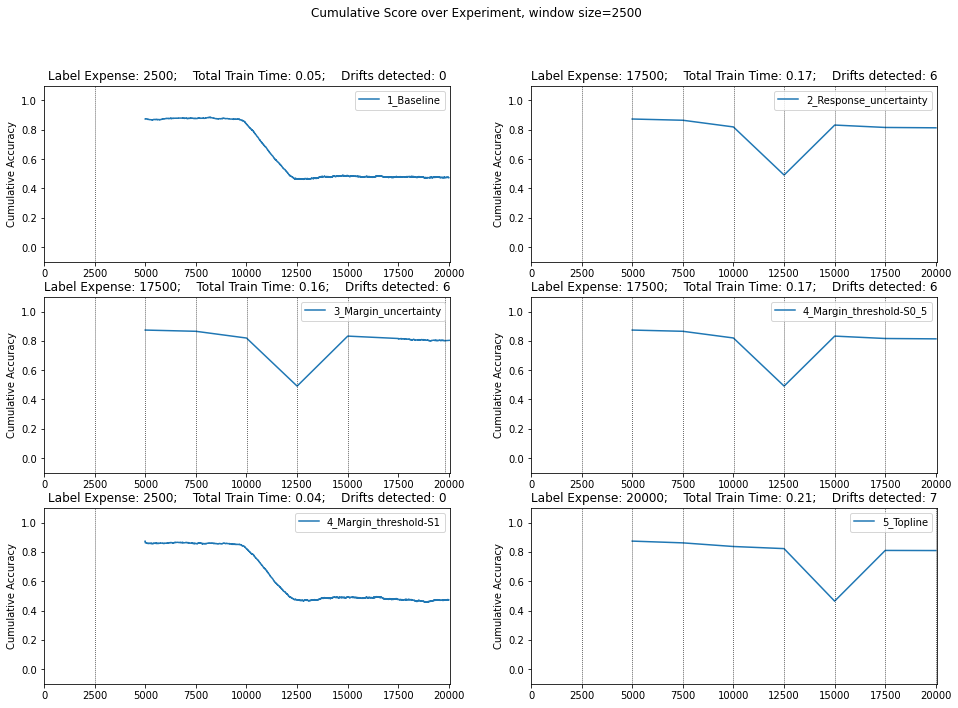

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.05,0.125,0,0,0,0,0.473200,0.000000
2_Response_uncertainty,0.17,0.875,6,1,5,0,0.813627,0.285714
3_Margin_uncertainty,0.16,0.875,6,1,5,0,0.828704,0.285714
4_Margin_threshold-S0_5,0.17,0.875,6,1,5,0,0.813627,0.285714
4_Margin_threshold-S1,0.04,0.125,0,2,0,2,0.472400,0.000000
5_Topline,0.21,1.000,7,1,6,0,0.809200,0.250000


Running experiments with window size = 3500


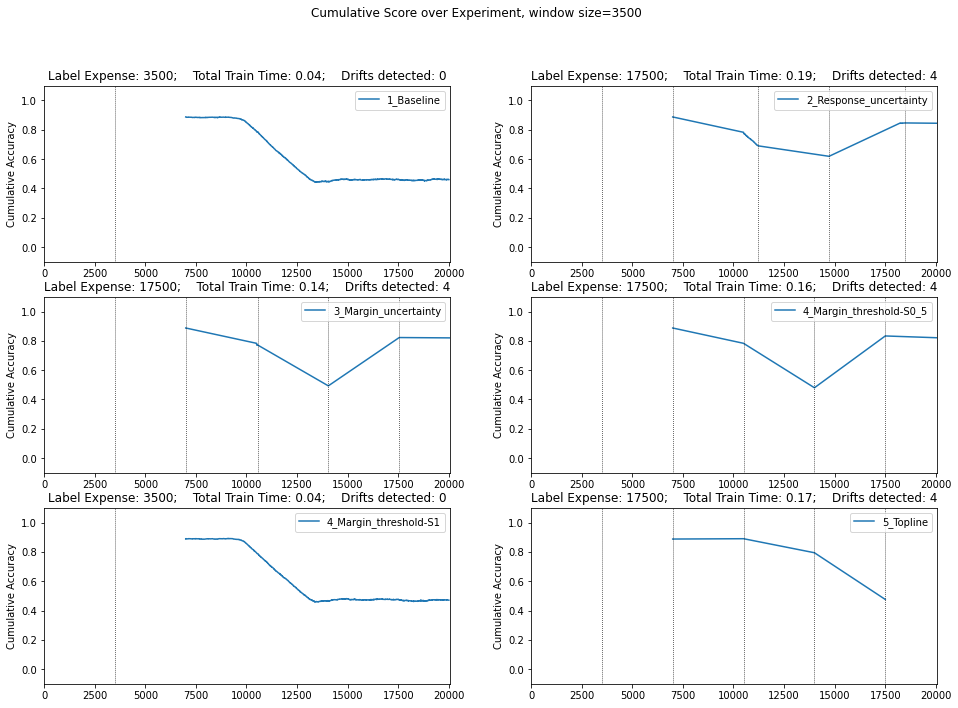

,Total training,% Labels used,Drift signaled,Drift occurred,False positives,False negatives,Cum. accuracy,F1 Score
Experiment,,,,,,,,
1_Baseline,0.04,0.175,0,0,0,0,0.460514,0.000000
2_Response_uncertainty,0.19,0.875,4,2,3,1,0.842208,0.333333
3_Margin_uncertainty,0.14,0.875,4,2,3,1,0.819331,0.333333
4_Margin_threshold-S0_5,0.16,0.875,4,1,3,0,0.816580,0.400000
4_Margin_threshold-S1,0.04,0.175,0,2,0,2,0.470557,0.000000
5_Topline,0.17,0.875,4,1,3,0,0.475714,0.400000


In [13]:
# Run experiments
delete_csv=True
for size_w in [500, 1500, 2500, 3500]:
    # Define dataset
    name_ds = "_15_data_RT_gradual"
    dataset_15 = Dataset(name_ds, full_df=dataset_RT_grad, column_mapping=column_mapping, window_size=size_w)
    # Run experiments
    print(f"Running experiments with window size = {dataset_15.window_size}")
    exps = define_run_exps(model, param_grid, dataset_15, delete_csv=delete_csv)
    delete_csv=False
    #Plot results
    fig, axs = plt.subplots(ncols=2, nrows=3, figsize = (16,11))
    axs = axs.flatten()
    i = 0
    for exp in exps:
        plot_experiment_error(exp, show_trainings=True, ax=axs[i])
        i+=1
    fig.suptitle(f"Cumulative Score over Experiment, window size={dataset_15.window_size}")
    plt.show()
    #plot_multiple_experiments(exps, change_points)
    display(aggregate_experiment_metrics(exps))

##### Inspección visual de resultados

Visualización de la distribución en las zonas detectadas como drift en Exp 2:


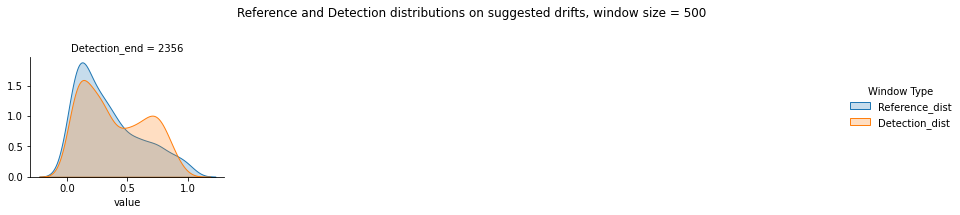

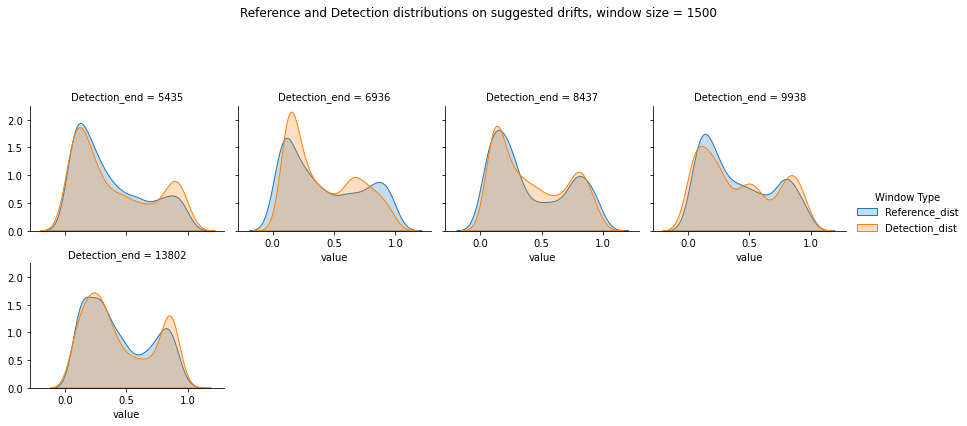

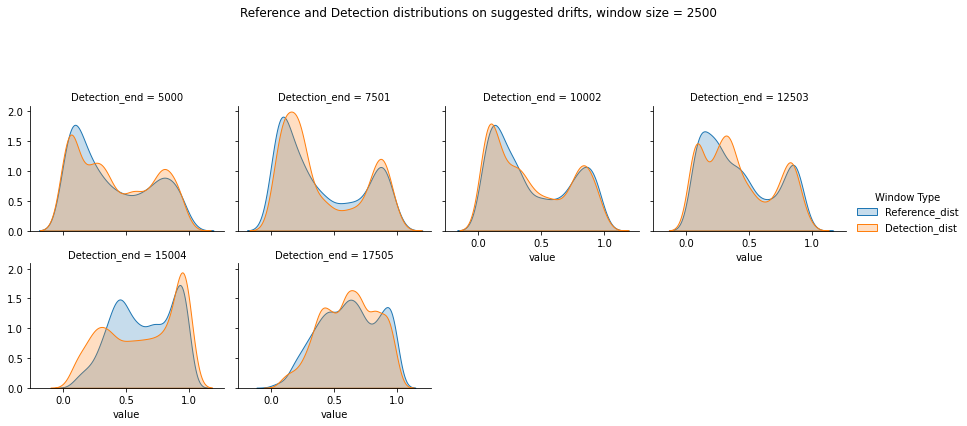

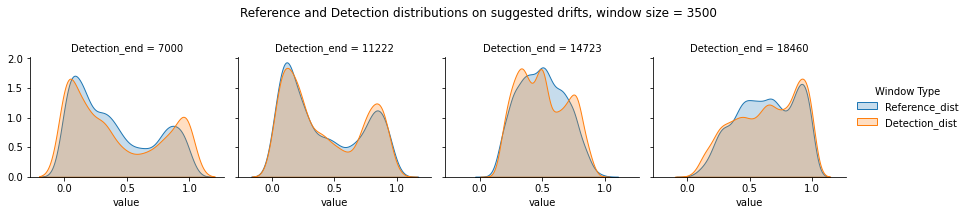

In [14]:
results_KS = pd.read_csv("./results/_15_data_RT_gradual_2_Response_uncertainty_results.csv", sep=",")

print("Visualización de la distribución en las zonas detectadas como drift en Exp 2:")
plot_KS_drift_distributions(results_KS,[500, 1500, 2500, 3500])

Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:


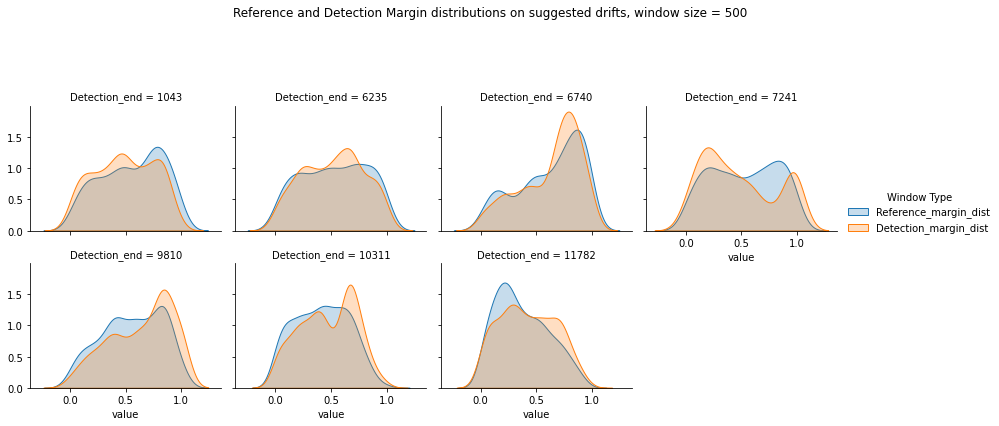

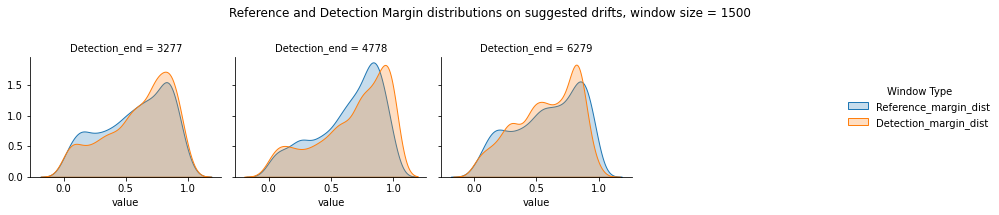

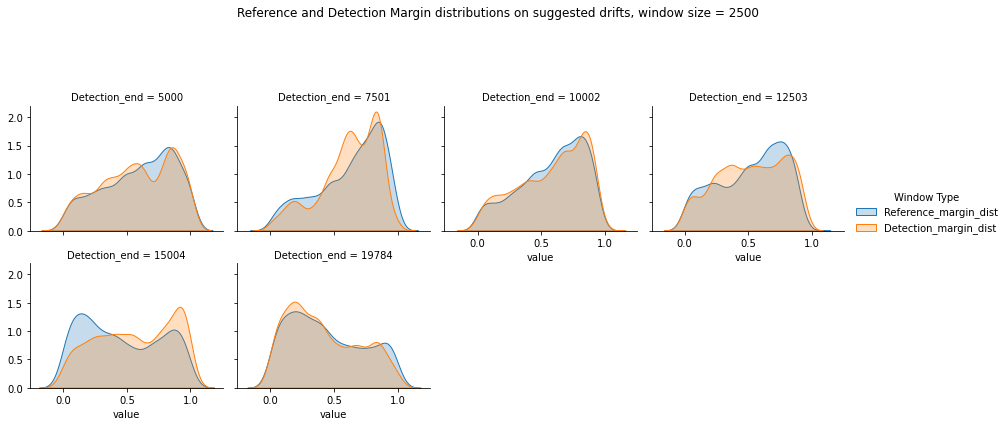

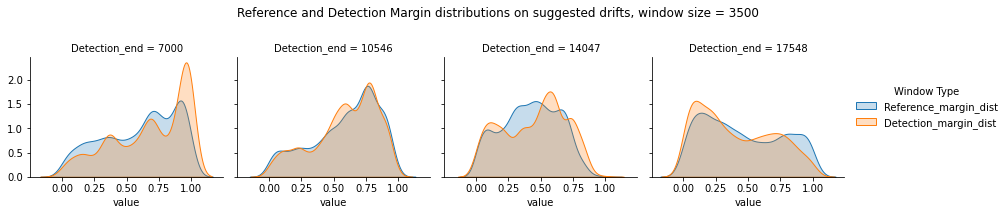

In [15]:
results_XS = pd.read_csv("./results/_15_data_RT_gradual_3_Margin_uncertainty_results.csv", sep=",", low_memory=False)

print("Visualización de la distribución del margen en las zonas detectadas como drift en Exp 3:")
plot_XS_drift_margin_distributions(results_XS, [500, 1500, 2500, 3500])